In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        # Import Library Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Downloading Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK" -O train.csv && rm -rf /tmp/cookies.txt

--2022-10-30 06:45:02--  https://docs.google.com/uc?export=download&confirm=t&id=1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK
Resolving docs.google.com (docs.google.com)... 172.217.203.138, 172.217.203.102, 172.217.203.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h3oog7ssugl7919ivcdon42mushan2sm/1667112300000/12463189437916965899/*/1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK?e=download&uuid=13891776-f994-4fde-b584-cd335fbde4d3 [following]
--2022-10-30 06:45:02--  https://doc-0o-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h3oog7ssugl7919ivcdon42mushan2sm/1667112300000/12463189437916965899/*/1v8mplnWxvuHd8yk1X6bMROz7zj5oKIiK?e=download&uuid=13891776-f994-4fde-b584-cd335fbde4d3
Resolving doc-0o-bg-docs.googleusercontent.com (doc-0o-bg-docs.googleusercontent.com)... 173.194.215.

In [ ]:
# Downloading Data from Gdrive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6" -O test.csv && rm -rf /tmp/cookies.txt

--2022-10-30 06:45:06--  https://docs.google.com/uc?export=download&confirm=t&id=1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6
Resolving docs.google.com (docs.google.com)... 172.217.203.101, 172.217.203.139, 172.217.203.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1q5ra004a8736jjcd0bqtkn2ruhjssen/1667112300000/12463189437916965899/*/1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6?e=download&uuid=ed5fbc00-3b88-4c81-ae46-6a8dd97b16e3 [following]
--2022-10-30 06:45:06--  https://doc-08-bg-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1q5ra004a8736jjcd0bqtkn2ruhjssen/1667112300000/12463189437916965899/*/1-901MHMdKf7QqwmLzCPx6jY4k2u0cQn6?e=download&uuid=ed5fbc00-3b88-4c81-ae46-6a8dd97b16e3
Resolving doc-08-bg-docs.googleusercontent.com (doc-08-bg-docs.googleusercontent.com)... 173.194.215.

In [ ]:
train = pd.read_csv("./train.csv")

test = pd.read_csv("./test.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Mengubah tipe data tanggal datang dan pulang
train["tgl_datang"] = pd.to_datetime(train["tgl_datang"], format='%Y-%m-%d')
train["tgl_pulang"] = pd.to_datetime(train["tgl_pulang"], format='%Y-%m-%d')

# Mengubah tipe data tanggal datang dan pulang
test["tgl_datang"] = pd.to_datetime(test["tgl_datang"], format='%Y-%m-%d')
test["tgl_pulang"] = pd.to_datetime(test["tgl_pulang"], format='%Y-%m-%d')

In [ ]:
# Menambah Kolom Lama Rawat
train["lama_rawat"] = (train["tgl_pulang"]-train["tgl_datang"]).dt.days.astype(int)
test["lama_rawat"] = (test["tgl_pulang"]-test["tgl_datang"]).dt.days.astype(int)

In [ ]:
# Menambah Kolom Tanggal/Bulan/Tahun
train["hari"] = train["tgl_datang"].dt.dayofweek.astype(int)
test["hari"] = test["tgl_datang"].dt.dayofweek.astype(int)

train["is_weekend"] = (train["tgl_datang"].dt.dayofweek.astype(int)>5).map({True:1,False:0})
test["is_weekend"] = (test["tgl_datang"].dt.dayofweek.astype(int)>5).map({True:1,False:0})

train["haripadatahun"] = train["tgl_datang"].dt.dayofyear.astype(int)
test["haripadatahun"] = test["tgl_datang"].dt.dayofyear.astype(int)

train["pekanpadatahun"] = train["tgl_datang"].dt.weekofyear.astype(int)
test["pekanpadatahun"] = test["tgl_datang"].dt.weekofyear.astype(int)

train["tanggal"] = train["tgl_datang"].dt.day.astype(int)
test["tanggal"] = test["tgl_datang"].dt.day.astype(int)

train["bulan"] = train["tgl_datang"].dt.month.astype(int)
test["bulan"] = test["tgl_datang"].dt.month.astype(int)

train["tahun"] = train["tgl_datang"].dt.year.astype(int)
test["tahun"] = test["tgl_datang"].dt.year.astype(int)

train["quarter"] = train["tgl_datang"].dt.quarter.astype(int)
test["quarter"] = test["tgl_datang"].dt.quarter.astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == "":


In [ ]:
#Apakah dirujuk
train["tidak_dirujuk"] = np.where(train.jenis_fkr == 98, 1, 0)
test["tidak_dirujuk"] = np.where(test.jenis_fkr == 98, 1, 0)

In [ ]:
#Encode label
train["label"] = train["label"].map({"Belum_Sehat":0,"Sehat":1})

In [ ]:
# Import label encoder
from sklearn import preprocessing

data = pd.concat([train,test])

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
data["kode_diag_icd"]=data["kode_diag_icd"].astype(str)
data["kode_diag_icd"]= label_encoder.fit_transform(data["kode_diag_icd"])

label_encoder = preprocessing.LabelEncoder()
data["kode_diag"]=data["kode_diag"].astype(str)
data["kode_diag"]= label_encoder.fit_transform(data["kode_diag"])

train=data[(data["label"]==1) | (data["label"]==0)]
test=data[(data["label"]!=1) & (data["label"]!=0)]

test = test.drop(columns="label")

In [ ]:
train=train.drop(columns=["tgl_datang","tgl_pulang","id_peserta","id_keluarga"])
test=test.drop(columns=["tgl_datang","tgl_pulang","id_peserta","id_keluarga"])

In [ ]:
# train=train.drop(columns=["tgl_datang","tgl_pulang"])
# test=test.drop(columns=["tgl_datang","tgl_pulang"])

In [ ]:
X = train.drop(columns=["label"])
y = train["label"]

X["poli_fktp"]=X["poli_fktp"].astype(int)
test["poli_fktp"]=test["poli_fktp"].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=32498)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056897 entries, 0 to 4056896
Data columns (total 28 columns):
 #   Column                Dtype  
---  ------                -----  
 0   bobot                 float64
 1   provinsi_fktp         int64  
 2   kota_fktp             int64  
 3   kepemilikan_fktp      int64  
 4   jenis_fktp            int64  
 5   tipe_fktp             int64  
 6   tingkatpel_fktp       int64  
 7   poli_fktp             int64  
 8   segmen_peserta_fktp   int64  
 9   kode_diag_icd         int64  
 10  kode_diag             int64  
 11  provinsi_fkr          int64  
 12  kota_fkr              int64  
 13  kepemilikan_fkr       int64  
 14  jenis_fkr             int64  
 15  tipe_fkr              int64  
 16  poli_fkr              int64  
 17  jenis_kunjungan_fktp  int64  
 18  lama_rawat            int64  
 19  hari                  int64  
 20  is_weekend            int64  
 21  haripadatahun         int64  
 22  pekanpadatahun        int64  
 23  tanggal

In [ ]:
#XGBDefault
xgb = XGBClassifier(tree_method='gpu_hist')
xgb.fit(X_train, y_train)
y_pred_xgb= xgb.predict(X_val)
print(classification_report(y_val, y_pred_xgb,digits=5))

              precision    recall  f1-score   support

         0.0    0.99963   0.99943   0.99953    658957
         1.0    0.99895   0.99932   0.99913    355268

    accuracy                        0.99939   1014225
   macro avg    0.99929   0.99938   0.99933   1014225
weighted avg    0.99939   0.99939   0.99939   1014225



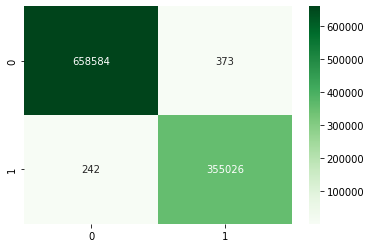

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_xgb)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
#XGBScalePosWeight
xgb2 = XGBClassifier(tree_method='gpu_hist',scale_pos_weight=1.85481664546)
xgb2.fit(X_train, y_train)
y_pred_xgb= xgb2.predict(X_val)
print(classification_report(y_val, y_pred_xgb,digits=5))

              precision    recall  f1-score   support

         0.0    0.99981   0.99917   0.99949    658957
         1.0    0.99845   0.99965   0.99905    355268

    accuracy                        0.99933   1014225
   macro avg    0.99913   0.99941   0.99927   1014225
weighted avg    0.99934   0.99933   0.99933   1014225



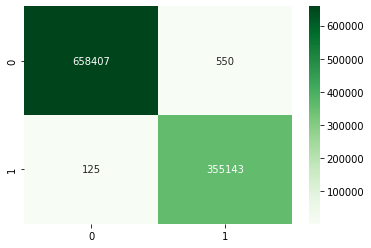

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_xgb)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
# OrderedDict([('colsample_bytree', 0.15569361722252437),
#              ('learning_rate', 0.7899908604656738),
#              ('max_depth', 2),
#              ('min_child_weight', 0.37591294734973124),
#              ('n_estimators', 2025),
#              ('reg_alpha', 76.19673390459751),
#              ('reg_lambda', 85.3733612786091),
#              ('scale_pos_weight', 1.0436905638007108),
#              ('subsample', 0.8999097103727699)])

In [ ]:
# OrderedDict([('colsample_bytree', 0.9800746585396013),
#              ('learning_rate', 0.457783799773815),
#              ('max_depth', 9),
#              ('min_child_weight', 1.0),
#              ('n_estimators', 914),
#              ('reg_alpha', 1e-09),
#              ('reg_lambda', 47.5195350807618),
#              ('scale_pos_weight', 1.0),
#              ('subsample', 0.1)])

In [ ]:
# XGBoost took 5641.64 seconds,  candidates checked: 15, best CV score: 0.999 ± 0.000
# Best parameters:
# OrderedDict([('colsample_bytree', 0.49309299633453885),
#              ('learning_rate', 0.09082965940463038),
#              ('max_depth', 10),
#              ('min_child_weight', 1.0),
#              ('n_estimators', 694),
#              ('reg_alpha', 0.1),
#              ('reg_lambda', 1.0),
#              ('scale_pos_weight', 4.684705352159883),
#              ('subsample', 1.0)])

In [ ]:
xgb_tuned = XGBClassifier(colsample_bytree=0.49309299633453885,learning_rate=0.09082965940463038,
                    max_depth=10,min_child_weight=1,n_estimators=694,
                    reg_alpha=0.1,reg_lambda=1,
                    scale_pos_weight=4.6847053521598830,
                    subsample=1,
                    tree_method='gpu_hist')
xgb_tuned.fit(X_train, y_train)
y_pred_xgb= xgb_tuned.predict(X_val)
print(classification_report(y_val, y_pred_xgb,digits=7))

              precision    recall  f1-score   support

         0.0  0.9998436 0.9994491 0.9996463    658957
         1.0  0.9989790 0.9997101 0.9993444    355268

    accuracy                      0.9995405   1014225
   macro avg  0.9994113 0.9995796 0.9994954   1014225
weighted avg  0.9995408 0.9995405 0.9995406   1014225



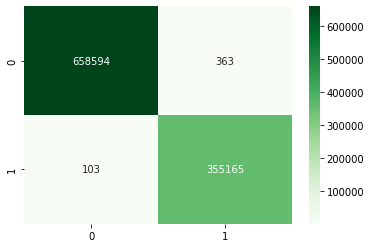

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_xgb)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
import copy
eclf = EnsembleVoteClassifier(clfs=[xgb, xgb2, xgb_tuned], weights=[1,1,1.1], voting="soft")

eclf.fit(X_train, y_train)
y_pred_eclf = eclf.predict(X_val)
print(classification_report(y_val, y_pred_eclf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    658957
         1.0       1.00      1.00      1.00    355268

    accuracy                           1.00   1014225
   macro avg       1.00      1.00      1.00   1014225
weighted avg       1.00      1.00      1.00   1014225



In [ ]:
print(classification_report(y_val, y_pred_eclf, digits=5))

              precision    recall  f1-score   support

         0.0    0.99981   0.99940   0.99961    658957
         1.0    0.99889   0.99965   0.99927    355268

    accuracy                        0.99949   1014225
   macro avg    0.99935   0.99953   0.99944   1014225
weighted avg    0.99949   0.99949   0.99949   1014225



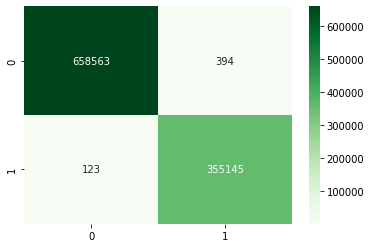

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_eclf)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


clf = StackingClassifier(estimators=[('xgb1',xgb), ('xgb2',xgb2), ('xgb3',xgb_tuned)], final_estimator=LogisticRegression())

clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_val)
print(classification_report(y_val, y_pred_clf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    658957
         1.0       1.00      1.00      1.00    355268

    accuracy                           1.00   1014225
   macro avg       1.00      1.00      1.00   1014225
weighted avg       1.00      1.00      1.00   1014225



In [ ]:
print(classification_report(y_val, y_pred_clf, digits=5))

              precision    recall  f1-score   support

         0.0    0.99972   0.99950   0.99961    658957
         1.0    0.99907   0.99948   0.99928    355268

    accuracy                        0.99949   1014225
   macro avg    0.99940   0.99949   0.99944   1014225
weighted avg    0.99949   0.99949   0.99949   1014225



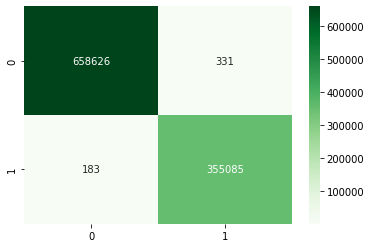

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_clf)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

clf2 = StackingClassifier(classifiers =[xgb, xgb2, xgb_tuned], meta_classifier = SVC() , use_probas = True)

clf2.fit(X_train, y_train)
y_pred_clf2 = clf2.predict(X_val)
print(classification_report(y_val, y_pred_clf2, digits=5))

              precision    recall  f1-score   support

         0.0    0.99970   0.99959   0.99964    658957
         1.0    0.99923   0.99945   0.99934    355268

    accuracy                        0.99954   1014225
   macro avg    0.99947   0.99952   0.99949   1014225
weighted avg    0.99954   0.99954   0.99954   1014225



In [ ]:
print(classification_report(y_val, y_pred_clf2, digits=7))

              precision    recall  f1-score   support

         0.0  0.9997010 0.9995872 0.9996441    658957
         1.0  0.9992345 0.9994455 0.9993400    355268

    accuracy                      0.9995376   1014225
   macro avg  0.9994678 0.9995164 0.9994921   1014225
weighted avg  0.9995376 0.9995376 0.9995376   1014225



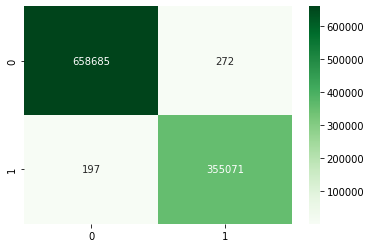

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_val, y_pred_clf2)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,ax=ax, cmap=plt.cm.Greens,fmt="d")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

scores = cross_val_score(xgb_tuned, X, y, cv=5, scoring='f1')

In [ ]:
print("Cross Validation Scores are {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Cross Validation Scores are [0.99931477 0.99924979 0.99931479 0.99923046 0.99932183]
Average Cross Validation score :0.9992863285746193


In [ ]:
from sklearn.model_selection import cross_val_score,KFold

scores = cross_val_score(clf2, X, y, cv=5, scoring='f1')

In [ ]:
print("Cross Validation Scores are {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Cross Validation Scores are [0.99933922 0.99929355 0.99933569 0.99929176 0.99935155]
Average Cross Validation score :0.9993223546100236


In [ ]:
# Cross Validation Scores are [0.99933922 0.99929355 0.99933569 0.99929176 0.99935155]
# Average Cross Validation score :0.9993223546100236

In [ ]:
from scipy.stats import randint
from scipy.stats import uniform

# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Metrics
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error, f1_score, make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt import gp_minimize # Bayesian optimization using Gaussian Processes
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args # decorator to convert a list of parameters to named arguments
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaYStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

In [ ]:
from time import time

import pprint
"""
A wrapper for measuring time and performances of different optmizers

optimizer = a sklearn or a skopt optimizer
X = the training set
y = our target
title = a string label for the experiment
"""
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# 5-fold StratifiedCV
kf = KFold(n_splits=5, shuffle=True, random_state=8)

# Scorer
scorer = make_scorer(f1_score)

# Setting the search space
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': [5,10,15,20],
                 'min_child_weight': Real(0.1, 1),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': [0.001, 0.01, 0.1, 0.5, 1], # L2 regularization
                 'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100], # L1 regularization
                 'n_estimators': Integer(50, 5000),
                 'scale_pos_weight':Real(1.0, 5.0, 'uniform')
   }


opt = BayesSearchCV(xgb,
                    search_spaces,
                    scoring='f1',
                    cv=kf,
                    n_jobs=1,
                    n_iter=20,# use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    verbose=1000)

In [ ]:
best_params = report_perf(opt, X, y,'XGBoost',
#best_params = report_perf(opt, trainx, trainy,'CatBoost',
                          callbacks=[DeltaYStopper(0.0001)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.8269045409083293, learning_rate=0.884828246121668, max_depth=15, min_child_weight=0.6011706350384911, n_estimators=542, reg_alpha=0.001, reg_lambda=0.5, scale_pos_weight=1.1166732473017067, subsample=0.7669879496234232
[CV 1/5; 1/1] END colsample_bytree=0.8269045409083293, learning_rate=0.884828246121668, max_depth=15, min_child_weight=0.6011706350384911, n_estimators=542, reg_alpha=0.001, reg_lambda=0.5, scale_pos_weight=1.1166732473017067, subsample=0.7669879496234232;, score=0.999 total time=  39.0s
[CV 2/5; 1/1] START colsample_bytree=0.8269045409083293, learning_rate=0.884828246121668, max_depth=15, min_child_weight=0.6011706350384911, n_estimators=542, reg_alpha=0.001, reg_lambda=0.5, scale_pos_weight=1.1166732473017067, subsample=0.7669879496234232
[CV 2/5; 1/1] END colsample_bytree=0.8269045409083293, learning_rate=0.884828246121668, max_depth=15, min_child_weight=0.601170635038491

In [ ]:
# XGBoost took 5641.64 seconds,  candidates checked: 15, best CV score: 0.999 ± 0.000
# Best parameters:
# OrderedDict([('colsample_bytree', 0.49309299633453885),
#              ('learning_rate', 0.09082965940463038),
#              ('max_depth', 10),
#              ('min_child_weight', 1.0),
#              ('n_estimators', 694),
#              ('reg_alpha', 0.1),
#              ('reg_lambda', 1.0),
#              ('scale_pos_weight', 4.684705352159883),
#              ('subsample', 1.0)])

In [ ]:
# XGBoost took 5712.47 seconds,  candidates checked: 20, best CV score: 0.999 ± 0.000
# Best parameters:
# OrderedDict([('colsample_bytree', 0.9800746585396013),
#              ('learning_rate', 0.457783799773815),
#              ('max_depth', 9),
#              ('min_child_weight', 1.0),
#              ('n_estimators', 914),
#              ('reg_alpha', 1e-09),
#              ('reg_lambda', 47.5195350807618),
#              ('scale_pos_weight', 1.0),
#              ('subsample', 0.1)])

In [ ]:
# XGBoost took 5495.43 seconds,  candidates checked: 16, best CV score: 0.997 ± 0.000
# Best parameters:
# OrderedDict([('colsample_bytree', 0.15569361722252437),
#              ('learning_rate', 0.7899908604656738),
#              ('max_depth', 2),
#              ('min_child_weight', 0.37591294734973124),
#              ('n_estimators', 2025),
#              ('reg_alpha', 76.19673390459751),
#              ('reg_lambda', 85.3733612786091),
#              ('scale_pos_weight', 1.0436905638007108),
#              ('subsample', 0.8999097103727699)])

In [ ]:
# categ_feat_idx=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
#        20, 25]